# Fake News Detector

## Installing Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [ ]:
data_fake=pd.read_csv('Fake.csv')
data_true=pd.read_csv('True.csv')

### Data Preview

In [ ]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
data_fake["class"]=0
data_true['class']=1

In [ ]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [ ]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis = 0, inplace = True)


data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis = 0, inplace = True)



In [ ]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [ ]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

<ipython-input-9-350d73592787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
<ipython-input-9-350d73592787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [ ]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
data_merge=pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


#### "title",  "subject" and "date" columns is not required for detecting the fake news, so I am going to drop the columns.

In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
data=data_merge.drop(['title','subject','date'], axis = 1)

In [ ]:
#count of missing values
data.isnull().sum()

,0
text,0
class,0


#### Randomly shuffling the dataframe

In [ ]:
data = data.sample(frac = 1)

In [ ]:
data.head()

,text,class
14150,"On March 20, 2016 Barkley had this to say abou...",0
10644,Social media lit up like crazy when Melania an...,0
14265,THIS IS SHOCKING! Two reporters from Rebel Pun...,0
21364,Michelle Obama received $70 million dollars fr...,0
12365,ROME (Reuters) - Italy s parliament will be di...,1


In [ ]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [ ]:
data.columns

Index(['text', 'class'], dtype='object')

In [ ]:
data.head()

,text,class
0,"On March 20, 2016 Barkley had this to say abou...",0
1,Social media lit up like crazy when Melania an...,0
2,THIS IS SHOCKING! Two reporters from Rebel Pun...,0
3,Michelle Obama received $70 million dollars fr...,0
4,ROME (Reuters) - Italy s parliament will be di...,1


<ipython-input-33-fd5b1d9ce521>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_merge, x='class',palette=custom_palette)


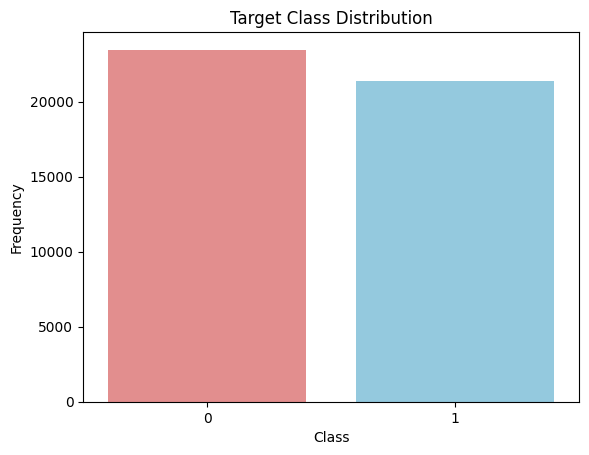

In [ ]:
custom_palette = {'0': 'lightcoral', '1': 'skyblue'}
sns.countplot(data=data_merge, x='class',palette=custom_palette)
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

<ipython-input-30-f92c1552469d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_merge, x='subject',palette='Blues')


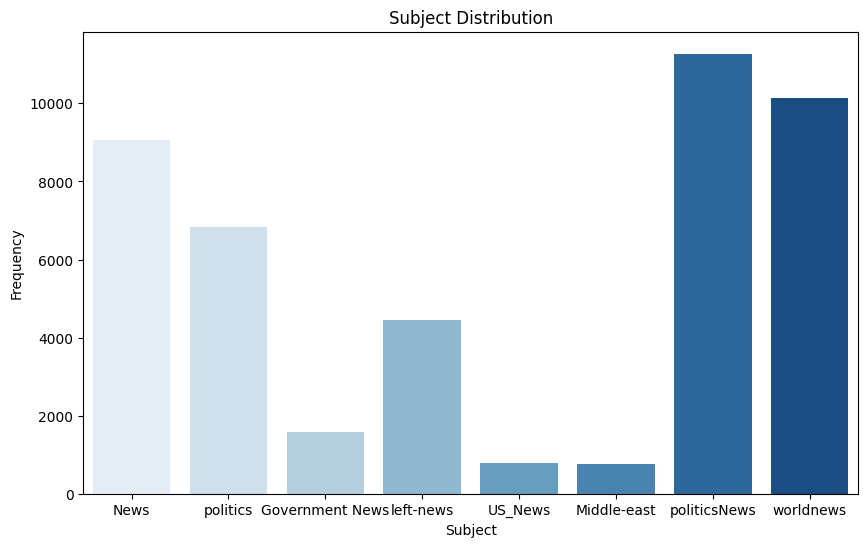

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_merge, x='subject',palette='Blues')
plt.title('Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Frequency')
plt.show()

## Preprocessing Text

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+',b'',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data['text'] = data['text'].apply(wordopt)

#### Defining dependent and independent variable as x and y

In [ ]:
x = data['text']
y = data['class']

## Training the model

#### Splitting the dataset into training set and testing set.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

### Extracting Features from the Text

#### Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [ ]:
pred_lr = LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9877896613190731

In [ ]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5873
           1       0.99      0.99      0.99      5347

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9959001782531194

In [ ]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5873
           1       0.99      0.99      0.99      5347

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Gradient Boost Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gb = GB.predict(xv_test)

In [ ]:
GB.score(xv_test, y_test)

0.9944741532976827

In [ ]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5873
           1       0.99      1.00      0.99      5347

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rf = RF.predict(xv_test)

In [ ]:
RF.score(xv_test, y_test)

0.9921568627450981

In [ ]:
print (classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5873
           1       0.99      0.99      0.99      5347

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



## Testing the Model

In [ ]:
def output_lable(n):
    if n==0:
        return "Fake News"
    elif n==1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)

    return print("\n\nLR Predicition: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction:{}".format(output_lable(pred_LR[0]),
                                                                                                             output_lable(pred_DT[0]),
                                                                                                             output_lable(pred_GB[0]),
                                                                                                             output_lable(pred_RF[0])))

### Model Testing With Manual Entry

In [ ]:
news = str(input())
manual_testing(news)

23471,Seven Iranians freed in the prisoner swap have not returned to Iran,"21st Century Wire says This week, the historic international Iranian Nuclear Deal was punctuated by a two-way prisoner swap between Washington and Tehran, but it didn t end quite the way everyone expected. On the Iranian side, one of the U.S. citizens who was detained in Iran, Nosratollah Khosravi-Roodsari, has stayed in Iran, but on the U.S. side   all 7 of the Iranians held in U.S. prisons DID NOT show up to their flight to Geneva for the prisoner exchange   with at least 3 electing to stay in the U.S  TEHRAN SIDE: In Iran, 5 U.S. prisoners were released, with 4 of them making their way to Germany via Switzerland.Will Robinson Daily MailNone of the Iranians freed in the prisoner swap have returned home and could still be in the United States, it has been reported.The seven former inmates, who were released as part of a deal with the Islamic republic, did not show up to get a flight to Geneva, Switzerland, wher

In [ ]:
news=str(input())
manual_testing(news)

21407,"Mata Pires, owner of embattled Brazil builder OAS, dies","SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo 

In [ ]:
pred_lr
pred_dt
pred_gb
pred_rf

array([1, 0, 0, ..., 0, 0, 0])

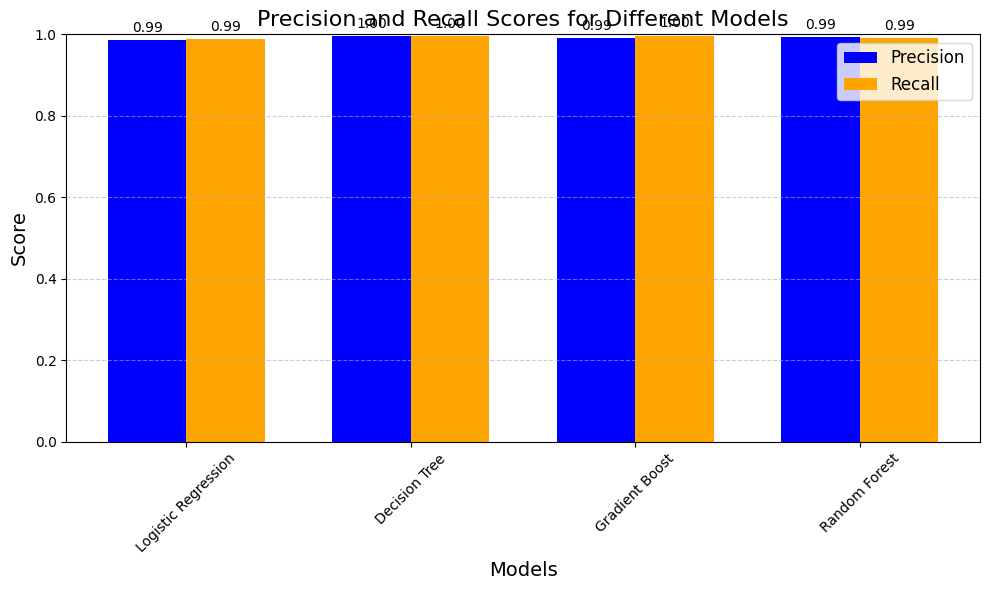

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score

# Recall scores
recalls = [
    recall_score(y_test, pred_lr),
    recall_score(y_test, pred_dt),
    recall_score(y_test, pred_gb),
    recall_score(y_test, pred_rf)
]

# Labels for the predictions
labels = ['Logistic Regression', 'Decision Tree Classifier', 'Gradient Boost Classifier', 'Random Forest Classifier']

# Plotting recall scores as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, recalls, color=['blue', 'green', 'orange', 'yellow'])
plt.title('Recall Scores for Different Models', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adding values at the end of bars
for index, value in enumerate(recalls):
    plt.text(value + 0.02, index, f'{value:.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()


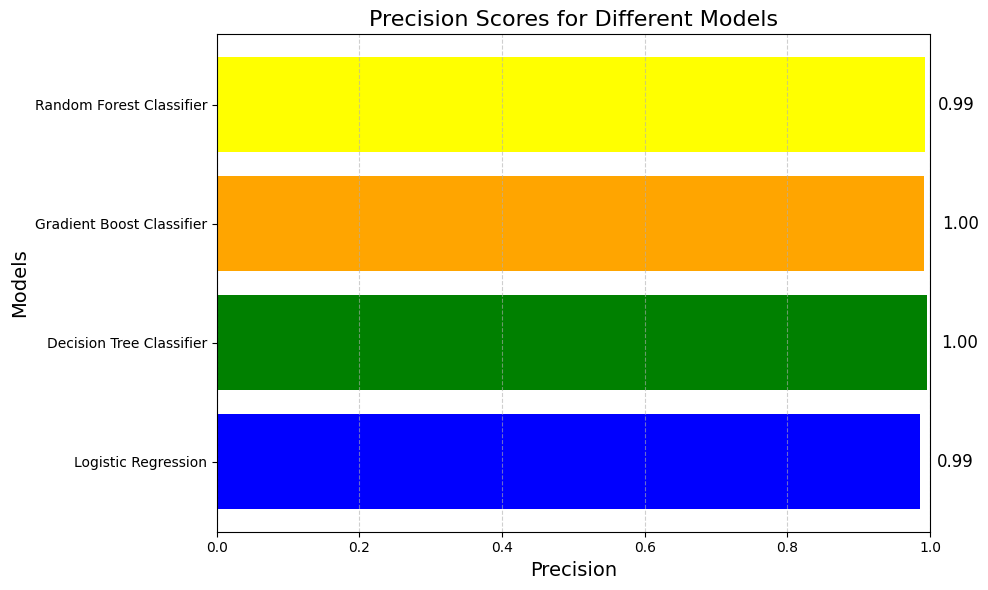

In [ ]:
from sklearn.metrics import precision_score

# Recall scores
precisions = [
    precision_score(y_test, pred_lr),
    precision_score(y_test, pred_dt),
    precision_score(y_test, pred_gb),
    precision_score(y_test, pred_rf)
]

# Labels for the predictions
labels = ['Logistic Regression', 'Decision Tree Classifier', 'Gradient Boost Classifier', 'Random Forest Classifier']

# Plotting recall scores as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, precisions, color=['blue', 'green', 'orange', 'yellow'])
plt.title('Precision Scores for Different Models', fontsize=16)
plt.xlabel('Precision', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adding values at the end of bars
for index, value in enumerate(recalls):
    plt.text(value + 0.02, index, f'{value:.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()


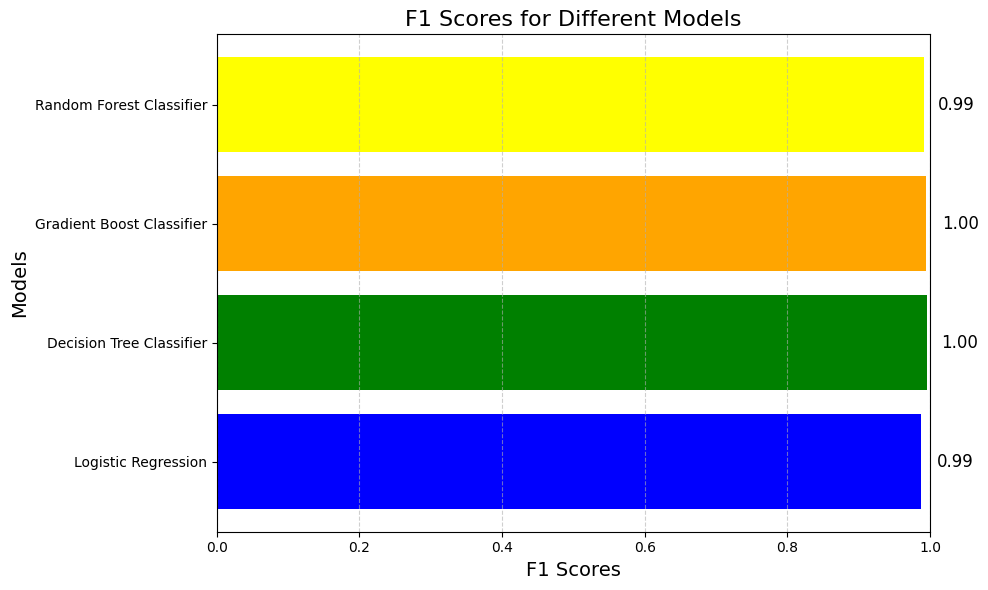

In [ ]:
from sklearn.metrics import f1_score
# Recall scores
f1s = [
    f1_score(y_test, pred_lr),
    f1_score(y_test, pred_dt),
    f1_score(y_test, pred_gb),
    f1_score(y_test, pred_rf)
]

# Labels for the predictions
labels = ['Logistic Regression', 'Decision Tree Classifier', 'Gradient Boost Classifier', 'Random Forest Classifier']

# Plotting recall scores as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(labels, f1s, color=['blue', 'green', 'orange', 'yellow'])
plt.title('F1 Scores for Different Models', fontsize=16)
plt.xlabel('F1 Scores', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adding values at the end of bars
for index, value in enumerate(recalls):
    plt.text(value + 0.02, index, f'{value:.2f}', va='center', fontsize=12)

plt.tight_layout()
plt.show()


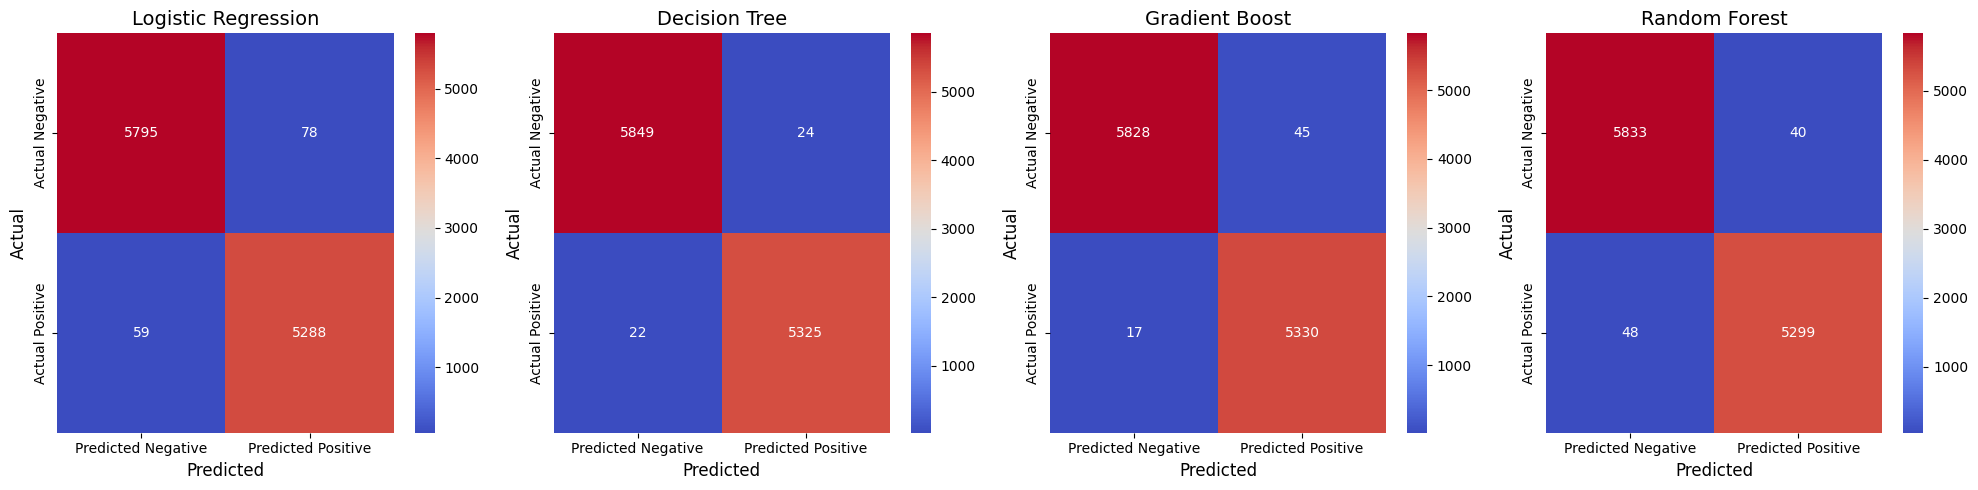

In [ ]:
from sklearn.metrics import confusion_matrix

# Model names
model_names = ['Logistic Regression', 'Decision Tree', 'Gradient Boost', 'Random Forest']

# List of predictions
predictions = [pred_lr, pred_dt, pred_gb, pred_rf]

# Set up subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Loop through models and plot their confusion matrices
for i, (pred, name) in enumerate(zip(predictions, model_names)):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["Actual Negative", "Actual Positive"], ax=axes[i])
    axes[i].set_title(name, fontsize=14)
    axes[i].set_xlabel('Predicted', fontsize=12)
    axes[i].set_ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.show()


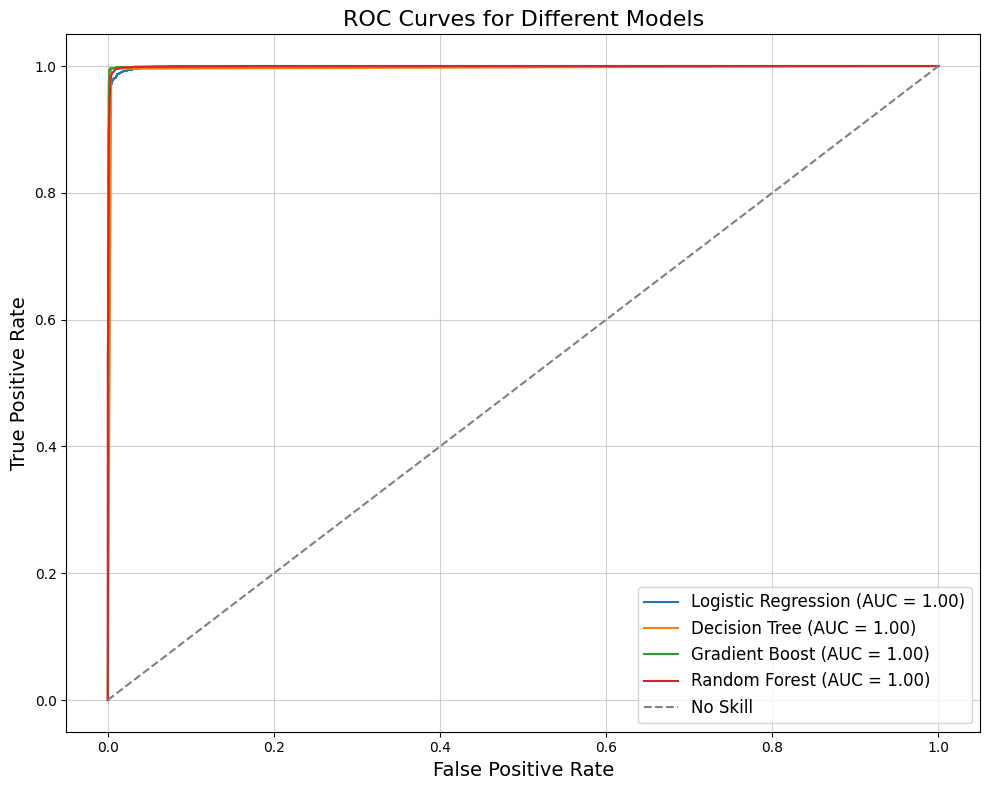

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

prob_lr = LR.predict_proba(xv_test)[:, 1]
y_prob_dt = DT.predict_proba(xv_test)[:, 1]
y_prob_gb = GB.predict_proba(xv_test)[:, 1]
y_prob_rf = RF.predict_proba(xv_test)[:, 1]

# Model names and probabilities
model_names = ['Logistic Regression', 'Decision Tree', 'Gradient Boost', 'Random Forest']
probabilities = [prob_lr, y_prob_dt, y_prob_gb, y_prob_rf]

# Plotting the ROC curves
plt.figure(figsize=(10, 8))

for y_prob, name in zip(probabilities, model_names):
    fpr, tpr, _ = roc_curve(y_test, y_prob)  # Calculate FPR, TPR
    roc_auc = auc(fpr, tpr)                 # Calculate AUC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal (no-skill) line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='No Skill')

# Add labels and legend
plt.title('ROC Curves for Different Models', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.6)
plt.tight_layout()
plt.show()
